In [1]:
import csv 
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import nltk.stem as stemmer
from wordcloud import WordCloud , STOPWORDS
import string 
import nltk
import textmining
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
os.chdir("D:\Datasets\Machine Learning\Text Mining\Python")

In [3]:
post = pd.read_csv("ImdbSA.csv")

In [4]:
post = post.iloc[:1000,]

In [5]:
post.shape

(1000, 2)

In [6]:
#nltk.download()

In [7]:
s = set(stopwords.words('english'))
exclude = set(string.punctuation)

In [8]:
print(len(s))
len(exclude)

179


32

In [9]:
def dataclean(doc):
    sf = " ".join([i for i in doc.lower().split() if i not in s])
    pf = ''.join([i for i in sf.lower() if i not in exclude])
    nf = ''.join(i for i in pf if not i.isdigit())
    return nf
pcorpus = [dataclean(post.iloc[i,1]) for i in range(0, post.shape[0])]

In [10]:
pcorpus[0]

'one reviewers mentioned watching  oz episode hooked right exactly happened mebr br the first thing struck oz brutality unflinching scenes violence set right word go trust me show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use wordbr br it called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffles death stares dodgy dealings shady agreements never far awaybr br i would say main appeal show due fact goes shows dare forget pretty pictures painted mainstream audiences forget charm forget romanceoz mess around first episode ever saw struck nasty surreal say ready it watched more developed taste oz got accustomed high levels graphic violence violence injustice crooked guards wholl sold nickel inmates wholl kill order get away it well mannered middl

In [11]:
tdm = textmining.TermDocumentMatrix()

for i in pcorpus:
    tdm.add_doc(i)

In [12]:
type(tdm)

textmining.TermDocumentMatrix

In [13]:
#Save for the future use
tdm.write_csv("TDM_dataframe.csv", cutoff=1)  #To make this work use textmining3

In [14]:
#plot 
df = pd.read_csv("TDM_dataframe.csv")
df.head(10)

,one,reviewers,mentioned,watching,oz,episode,hooked,right,exactly,happened,...,ammobr,offices,setsbr,geneticallymodified,deadlinesbr,creaturesbr,intuition,stubborn,mindsbr,volumebr
0,1,1,1,2,5,2,1,2,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,2,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


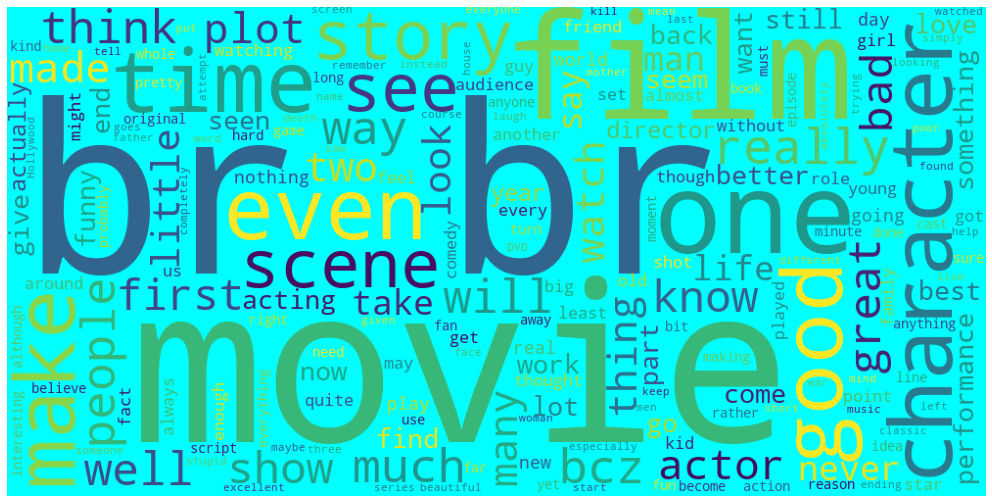

In [15]:
wordCloud = WordCloud(width= 1000, height= 500, 
                      stopwords = STOPWORDS, 
                      background_color='cyan').generate(' '.join(post['review']))
plt.figure(figsize=( 20,9))
plt.imshow(wordCloud)
plt.axis('off') #NO X AND Y AXIS 
plt.show()


In [16]:
## Sentiment Analysis

In [17]:
Results = pd.DataFrame()

In [18]:
for i in range(0, post.shape[0]):
    blob = TextBlob(post.iloc[i,1])
    temp = pd.DataFrame({'columns': post.iloc[i,1],
                        'polarity': blob.sentiment.polarity},
                        index= [0])
    Results = Results.append(temp)

In [19]:
FR_vader = pd.DataFrame()
analyzer = SentimentIntensityAnalyzer()
for i in range(0,post.shape[0]):
    #print(i)
    snt = analyzer.polarity_scores(post.iloc[i,1])
    temp = pd.DataFrame({'columns': post.iloc[i,1],
                        'polarity': list(snt.items())[3][1]},
                        index = [0])
    FR_vader = FR_vader.append(temp)

In [20]:
max(FR_vader.head(1000)['polarity'])

0.9996

In [21]:
FR_vader.head(10)

,columns,polarity
0,One of the other reviewers has mentioned that ...,-0.9916
0,A wonderful little production. <br /><br />The...,0.9670
0,I thought this was a wonderful way to spend ti...,0.9519
0,Basically there's a family where a little boy ...,-0.9213
0,"Petter Mattei's ""Love in the Time of Money"" is...",0.9744
0,"Probably my all-time favorite movie, a story o...",0.9828
0,I sure would like to see a resurrection of a u...,0.9022
0,"This show was an amazing, fresh & innovative i...",0.8730
0,Encouraged by the positive comments about this...,0.2362
0,If you like original gut wrenching laughter yo...,0.9507
